## Philosphy:  Lets learn programming language to solve a problem and not to solve coding complexities.

### Mall Customer Segmentation Data
https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python

#### Description of dataset: 
This file contains the basic information (ID, age, gender, income, spending score) about the customer

#### Explore the dataset for follwoing questons:
- Does age of a customer impact spending nature ?
- Does Annual Income play a role in spendings by a customer ?

In [ ]:
# Pythonic way to read a file
with open('Mall_Customers.csv',"r") as file: # f is a file handler, while "r" is the mode (r for read)
    for line in file:
        print(line)

### Refer below for more details on filehandlers in python
https://docs.python.org/3.7/tutorial/inputoutput.html

In [ ]:
"8,Female,23,18,94".split(",")

In [ ]:
# Initiate lists to store individual column values
read_list = []
customerID =[]
gender = []
age =[]
annual_income_dollar = []
spending_score = []

# Use Python I/O file handlers
with open('Mall_Customers.csv') as file:
    for f in file:
        temp = f.split(',') # splitting each line as values are separated by ','
        print(temp)
        customerID.append(temp[0]) # appending each value to respective list
        gender.append(temp[1])
        age.append(temp[2])
        annual_income_dollar.append(temp[3])
        spending_score.append(temp[4])

# Create dictionary to combine data
mall_dict = {customerID[0]:customerID[1:], gender[0]:gender[1:],age[0]:age[1:], 
             annual_income_dollar[0]: annual_income_dollar[1:], 
             spending_score[0]:spending_score[1:]}

In [ ]:
mall_dict

In [ ]:
temporary_list = []
for x in spending_score[1:]:
    temp = x.split('\n')
    temp = temp[0]
    temp = int(temp)
    temporary_list.append(temp)
print(temporary_list[0:5])

id_list = [int(x.split('\n')[0]) for x in spending_score[1:]]
print(listComprehension[0:5])

In [ ]:
mall_dict['spending_score'] = [int(x.split('\n')[0]) for x in spending_score[1:]]
#print(mall_dict)

__List Comprehensions__. List comprehensions is a pythonic way to provide a concise way to create lists. It consists of brackets containing an expression followed by a for clause, then zero or more for or if clauses. 

In [ ]:
mall_dict = {customerID[0]:customerID[1:], gender[0]:gender[1:],age[0]:[int(x) for x in age[1:]], 
             annual_income_dollar[0]: [int(x) for x in annual_income_dollar[1:]]
             , spending_score[0]: [int(x.split('\n')[0]) for x in spending_score[1:]]}
print(mall_dict)

### Now thats tedious !!!! To Write so many lines to export a file :(

### Libraries
Often times, we need either internal or external help for complicated computation tasks. In these occasions, we need to _import libraries_. 

#### Built in Packages
Python provides many built-in packages to prevent extra work on some common and useful functions
We will use __math__ as an example.

#### Most Commonly used Packags for Machine Learning in Python:
- Pandas http://pandas.pydata.org/pandas-docs/stable/reference/index.html
- Numpy https://docs.scipy.org/doc/numpy/user/quickstart.html
- Scipy https://docs.scipy.org/doc/scipy/reference/
- Matplotlib https://matplotlib.org/contents.html
- Scikit learn https://scikit-learn.org/stable/user_guide.html

### Pandas (Python Data Analysis Library) is a great package for data structures: DataFrame)
A great library to slic and dice data and visualize it in a columnar format. Its API provides wide range of functionalities that makes data analysis a fun and true strength of Python as prefered choice over other programming languages.

In [1]:
# Export the Mall dataset using Pandas
import pandas as pd # loading pandas library and giving it an alise pd to make code less verbose
import numpy as np

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [ ]:
df.head()

In [ ]:
type(df)

In [ ]:
df.columns

In [ ]:
print(df.head()) # top n reocrds
print(df.tail(n=10)) # last n records
print(df.shape) # rows x columns

In [ ]:
df.describe(include = "all")

In [ ]:
df.groupby(['Gender']).mean()

In [ ]:
df.groupby(['Gender']).count()

In [ ]:
df.columns

In [3]:
# Rename a single or multiple columns
df.rename(columns={'CustomerID':'id','Spending Score (1-100)':'score','Annual Income (k$)':'income'},inplace=True)

In [ ]:
df.columns

### Slicinig a data frame 
It is one the most common operation done while analyzing the data. Slicing of a datafrmae can happen using either name of columns / rows or location index of the columns.

In [ ]:
df_new = df['id'] # to select a specific column by its name
df_new

In [ ]:
df_new = df.loc[0:10,['Gender','Age']] # uisng poistional slicing of dataframe along with name of columns
df_new

In [ ]:
df_new = df.iloc[0:10,0:2] # using iloc for positional slicing along rows and columns
df_new

### Filter & Sort dataframe
Filtering or sorting dataframe is commonly done to extract specific values basis a rule. Filtering / Sorting can happen basis one more columns

In [ ]:
df.head()

In [ ]:
df.iloc[::-1]

In [ ]:
df_new = df[df['Gender'] == 'Male']
df_new

In [ ]:
# Using & operator, don't forget to wrap the sub-statements with ()
df_new = df[(df['Gender'] == 'Male') & (df['Age'] >= 20)] 
df_new

In [ ]:
#Sorting of data frame basis a single columns
df_new = df.sort_values(by = ['score'], ascending=[False])
df_new

In [ ]:
#Sorting of data frame basis multiple columns
df_new = df.sort_values(by = ['Gender','income'], ascending=[True,False])
df_new

### Data Visualization
Visualization is one of the most important things of data analysis. Besides just producing ___readable___ plots, we should make an effort to improve the overall attractiveness of the plots. `matplotlib` is a powerful package for ___Python___ users. Let's start with an example.

In [4]:
from matplotlib import pyplot as plt
%matplotlib inline
# this magic line is important to plot graph within jupyter notebook cell

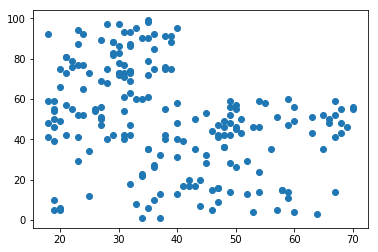

In [5]:
plt.scatter(x = df['Age'], y = df.score) # df.score - is another method to access a specific column of data frame

The above graph does not have any labels and is inconclusive of any information. Lets add some context to the above scatter plot.

Text(0.5,1,'Age vs Spending Score')

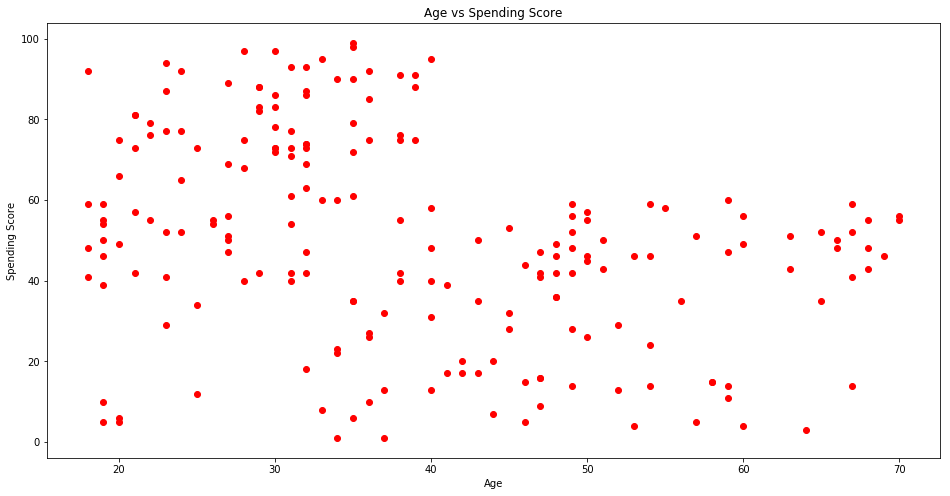

In [6]:
plt.figure(figsize=(16,8)) # Adding size to the graph- width by height
# Use `+` as marker; color set as `g` (green); size proportion to Y values
plt.scatter(x = df['Age'], y = df.score, c='r') 
# set x/y labels
plt.xlabel('Age')
plt.ylabel('Spending Score')
# set title
plt.title('Age vs Spending Score')

### Anatomy of Figure
Before we go deeper, let's take a look at the structure of a figure in `matplotlib`:

<img width=700 src="https://matplotlib.org/_images/anatomy1.png">

As you can see, we have done things for many of the elements. There's no need to memorize them, though. We can always Google and find information on specific parts that we want to update.

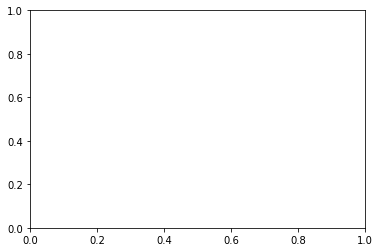

In [7]:
fig, ax = plt.subplots()

Text(0.5,1,'Age Vs Spending Score')

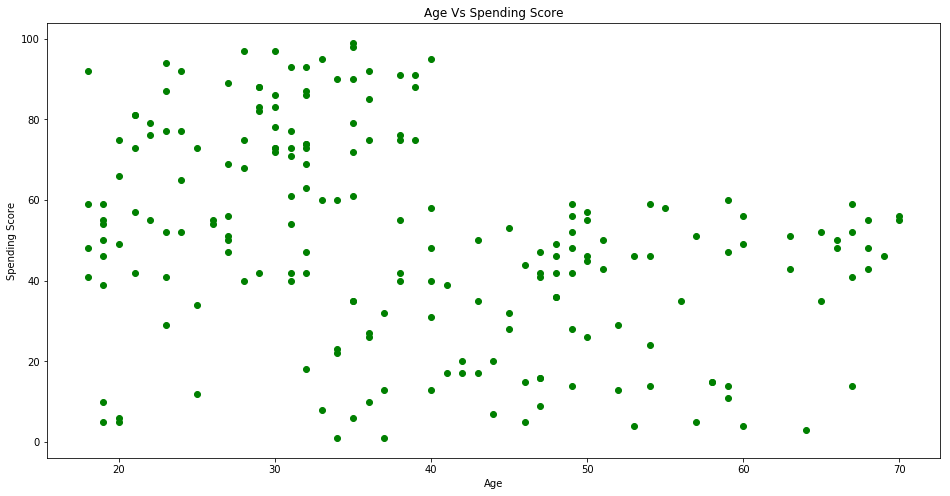

In [8]:
#The Figure is like a canvas, and the Axes is a part of that canvas on which we will make a particular visualization.
fig, ax = plt.subplots()
fig.set_figwidth(16)
fig.set_figheight(8)
# What we just did, applying to `ax`
ax.scatter(x = df['Age'], y = df.score, c='g') 
#ax.plot(x = df['Age'], y = df.score, linestyle='dashed', color='k')
#ax.axis([0, 10, 0, 35])
ax.set_xlabel('Age')
ax.set_ylabel('Spending Score')
ax.set_title('Age Vs Spending Score')

In [10]:
means = df.groupby('Gender').mean()
print(means)

                id        Age     income      score
Gender                                             
Female   97.562500  38.098214  59.250000  51.526786
Male    104.238636  39.806818  62.227273  48.511364


In [11]:
print(means.index)

Index(['Female', 'Male'], dtype='object', name='Gender')


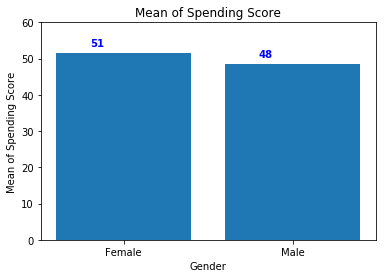

In [25]:
fig, ax = plt.subplots()

ax.bar(x = means.index, height = means['score'])
#ax.barh(x = df['Gender'], height = np.mean(df.score))
ax.set_title('Mean of Spending Score')
ax.set_xlabel('Gender')
ax.set_ylabel('Mean of Spending Score')
ax.set_ylim(top = 60)
for i, v in enumerate(means['score']):
    ax.text(i- 0.2, v + 2, s = int(v), color='blue', fontweight='bold')